In [1]:
# Load in relevant libraries, and alias where appropriate
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

In [2]:
# Define relevant variables for the ML task
batch_size = 64
num_classes = 10
learning_rate = 0.01
num_epochs = 5

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Use transforms.compose method to reformat images for modeling,
# and save to variable all_transforms for later use
all_transforms = transforms.Compose([transforms.Resize((32,32)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                                                          std=[0.2023, 0.1994, 0.2010])
                                     ])

In [5]:

# Create Training dataset
train_dataset = torchvision.datasets.CIFAR10(root = './data',
                                             train = True,
                                             transform = all_transforms,
                                             download = True)

Files already downloaded and verified


In [4]:
# Create Testing dataset
test_dataset = torchvision.datasets.CIFAR10(root = './data',
                                            train = False,
                                            transform = all_transforms,
                                            download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [6]:

# Instantiate loader objects to facilitate processing
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

In [7]:
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

In [8]:
trainiter=iter(train_loader)
images,labels=trainiter.next()
images.shape

torch.Size([64, 3, 32, 32])

In [9]:
len(labels)

64

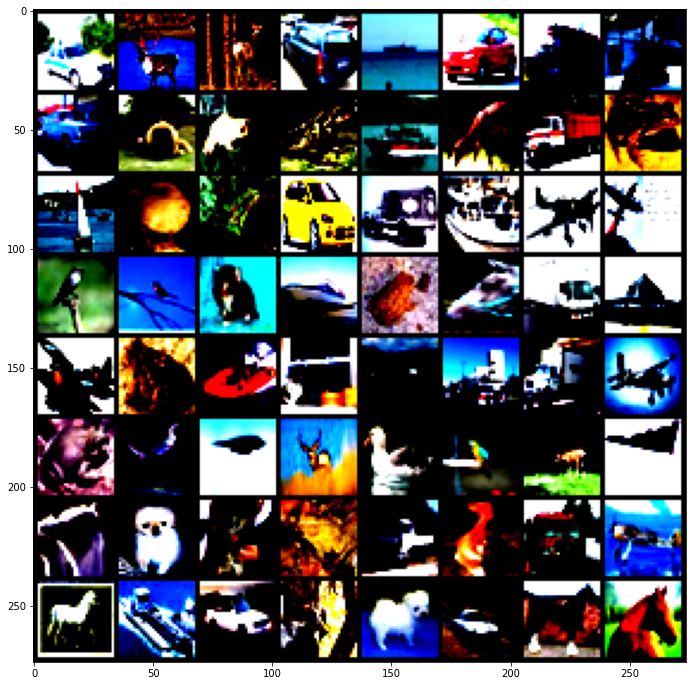

In [10]:
plt.figure(figsize=(12,12))
plt.imshow((make_grid(images).numpy().transpose((1,2,0))))
# plt.imshow(images)


In [11]:
testiter=iter(test_loader)
images,labels=testiter.next()
images.shape

torch.Size([64, 3, 32, 32])

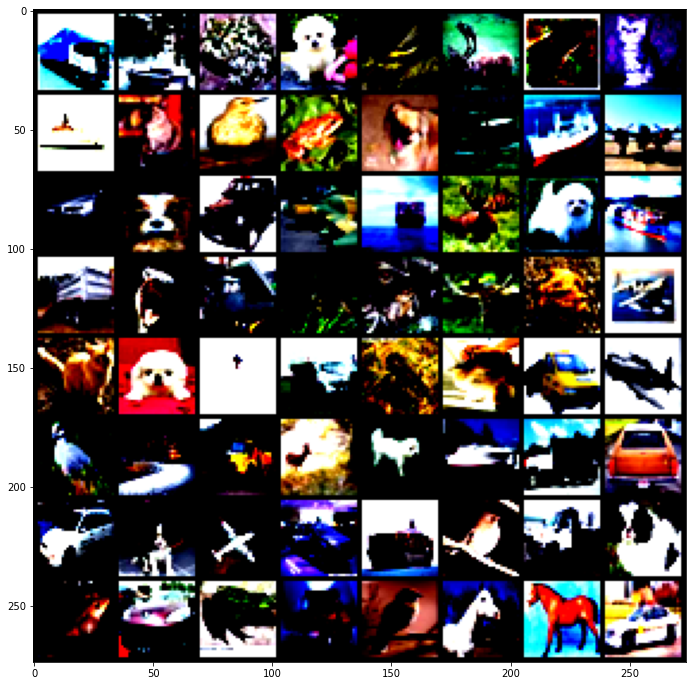

In [12]:
plt.figure(figsize=(12,12))
plt.imshow((make_grid(images).numpy().transpose((1,2,0))))

In [13]:
# Creating a CNN class
class ConvNeuralNet(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        # definning the convolutional layer 1 & 2
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        # definning the convolutional layer 3 & 4
        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        # applying the linear function
        self.fc1 = nn.Linear(1600, 128)
        # applying the relu activation function
        self.relu1 = nn.ReLU()
        # converting the size into the number classes 
        self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        # function to perform the feedforward
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)
        
        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [14]:
model = ConvNeuralNet(num_classes)

In [15]:
# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

In [16]:
# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9) 

In [17]:

total_step = len(train_loader)
# We use the pre-defined number of epochs to determine how many iterations to train the network on
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/5], Loss: 0.9267
Epoch [2/5], Loss: 1.1707
Epoch [3/5], Loss: 1.1741
Epoch [4/5], Loss: 1.0370
Epoch [5/5], Loss: 0.6027


Initially, learning rate = 0.01<br>
Assigning a new value to the learning rate = 0.05

In [33]:
learning_rate = 0.001

In [34]:
model = ConvNeuralNet(num_classes)

In [35]:
# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

In [36]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9) 

In [37]:

total_step = len(train_loader)
# We use the pre-defined number of epochs to determine how many iterations to train the network on
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/5], Loss: 1.7466
Epoch [2/5], Loss: 1.4245
Epoch [3/5], Loss: 1.6345
Epoch [4/5], Loss: 1.1199
Epoch [5/5], Loss: 0.9340
